In [8]:
import tensorflow as tf
from tensorflow.keras import  datasets,  layers, models
from tensorflow.keras.optimizers import Adam
from	tensorflow.keras.preprocessing.image import	ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [9]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0



11490434/11490434 [==============================] - 0s 0us/step


In [10]:
# Add channel dimension to the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))



In [11]:
# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.1, random_state=42)


In [12]:
# Data augmentation for training images
datagen	=	ImageDataGenerator(rotation_range=10,	zoom_range=0.1,	width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(train_images)


In [13]:
# Create a CNN model with hyperparameter tuning and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,	activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),	loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
epochs=20, validation_data=(val_images, val_labels))
# Evaluate the model on the test set
test_loss,	test_acc	=	model.evaluate(test_images,	test_labels)
print(f"Test Accuracy: {test_acc}")


Epoch 1/20
844/844 [==============================] - 66s 77ms/step - loss: 0.3751 - accuracy: 0.8794 - val_loss: 0.0654 - val_accuracy: 0.9803
Epoch 2/20
844/844 [==============================] - 64s 75ms/step - loss: 0.1301 - accuracy: 0.9594 - val_loss: 0.0405 - val_accuracy: 0.9872
Epoch 3/20
844/844 [==============================] - 64s 76ms/step - loss: 0.0952 - accuracy: 0.9708 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 4/20
844/844 [==============================] - 64s 76ms/step - loss: 0.0793 - accuracy: 0.9752 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 5/20
844/844 [==============================] - 63s 75ms/step - loss: 0.0703 - accuracy: 0.9784 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 6/20
844/844 [==============================] - 63s 75ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0325 - val_accuracy: 0.9910
Epoch 7/20
844/844 [==============================] - 64s 75ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0278 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


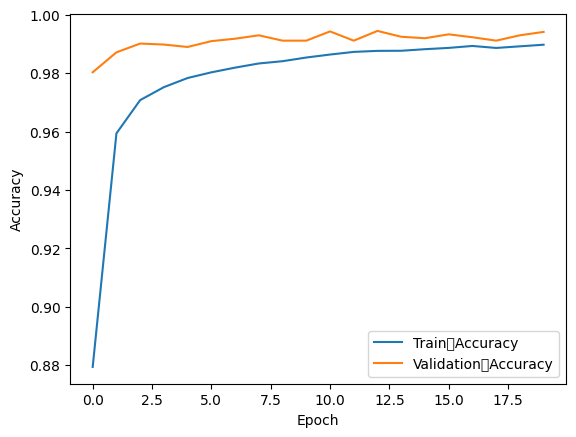

In [18]:
# Plot training history
plt.plot(history.history['accuracy'],
label='Train	Accuracy')
plt.plot(history.history['val_accuracy'],
label='Validation	Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
